In [ ]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
#  2. Load the Dataset
df = pd.read_csv('/content/adult 3.csv')
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
# 3. Data Cleaning & Preprocessing
print("Initial Shape:", df.shape)
print("Missing values:\n", df.isnull().sum())

df = df.dropna()
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

df.head()


Initial Shape: (48842, 15)
Missing values:
 age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39,0


In [ ]:
# 4. Feature and Target Selection
# Assuming 'salary' is the target column
X = df.drop('income', axis=1)
y = df['income']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# 5. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
#  6. Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Evaluation
y_pred_lr = lr.predict(X_test)
print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))


Linear Regression R2 Score: 0.25861488207720007
Linear Regression MSE: 0.13305238395620564


In [ ]:
#  7. K Neighbors Model
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)

# Evaluation
y_pred_kn = kn.predict(X_test)
print("K Neighbors algorithm Score:", r2_score(y_test, y_pred_lr))
print("K Neighbors MSE:", mean_squared_error(y_test, y_pred_lr))


K Neighbors algorithm Score: 0.25861488207720007
K Neighbors MSE: 0.13305238395620564


In [ ]:
# 8. Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))


Random Forest R2 Score: 0.45408323000403883
Random Forest MSE: 0.09797273499789583


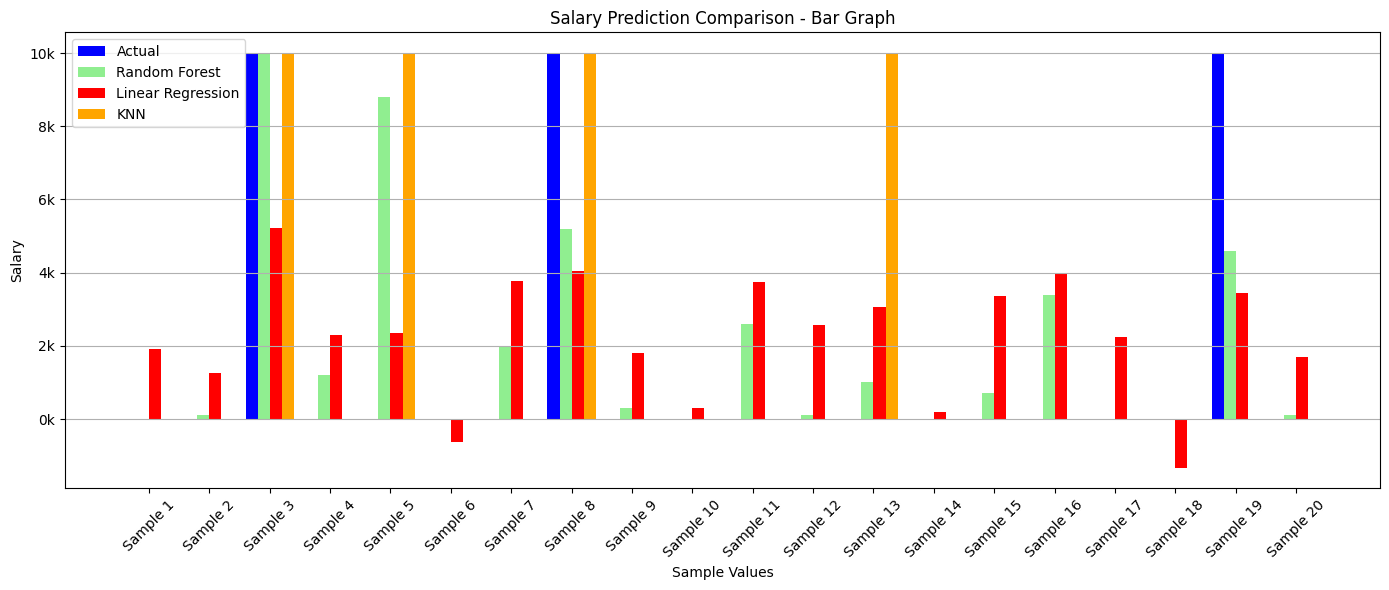

In [ ]:
n = 20
indices = np.arange(n)
bar_width = 0.2

plt.figure(figsize=(14, 6))

plt.bar(indices, y_test.values[:n], bar_width, label='Actual', color='blue')
plt.bar(indices + bar_width, y_pred_rf[:n], bar_width, label='Random Forest', color='lightgreen')
plt.bar(indices + 2 * bar_width, y_pred_lr[:n], bar_width, label='Linear Regression', color='red')
plt.bar(indices + 3 * bar_width, y_pred_kn[:n], bar_width, label='KNN', color='orange')

plt.xlabel("Sample Values")
plt.ylabel("Salary")
plt.title("Salary Prediction Comparison - Bar Graph")
plt.xticks(indices + 1.5 * bar_width, [f"Sample {i+1}" for i in range(n)], rotation=45)

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x*10)}k'))

plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()
